In [41]:
import pandas as pd 
import numpy as np
import seaborn as sns
df = pd.read_csv("database_IND.csv")
df.columns#printing all the columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [42]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#Checking null value
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [44]:
df.shape

(907, 27)

In [45]:
#Taking columns that are required for consideration
df_1 = df[['country_long','name', 'capacity_mw','latitude','longitude','primary_fuel','geolocation_source']]
df_1

,country_long,name,capacity_mw,latitude,longitude,primary_fuel,geolocation_source
0,India,ACME Solar Tower,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory
1,India,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,WRI
2,India,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,WRI
3,India,AGARTALA GT,135.0,23.8712,91.3602,Gas,WRI
4,India,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,WRI
...,...,...,...,...,...,...,...
902,India,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,WRI
903,India,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,Industry About
904,India,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,WRI
905,India,ZAWAR MINES,80.0,24.3500,73.7477,Coal,WRI


In [46]:
df_1['plant_name(country)']=df_1[['name','country_long']].apply(lambda x: x['name']+'('+x['country_long']+')',axis=1)
df_1

<ipython-input-46-5e875fd1b936>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['plant_name(country)']=df_1[['name','country_long']].apply(lambda x: x['name']+'('+x['country_long']+')',axis=1)


,country_long,name,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,plant_name(country)
0,India,ACME Solar Tower,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,ACME Solar Tower(India)
1,India,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,WRI,ADITYA CEMENT WORKS(India)
2,India,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,WRI,AES Saurashtra Windfarms(India)
3,India,AGARTALA GT,135.0,23.8712,91.3602,Gas,WRI,AGARTALA GT(India)
4,India,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,WRI,AKALTARA TPP(India)
...,...,...,...,...,...,...,...,...
902,India,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,WRI,YERMARUS TPP(India)
903,India,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,Industry About,Yelesandra Solar Power Plant(India)
904,India,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,WRI,Yelisirur wind power project(India)
905,India,ZAWAR MINES,80.0,24.3500,73.7477,Coal,WRI,ZAWAR MINES(India)


In [56]:
df_1= df_1.drop(['country_long','name'], axis = 1)

In [57]:
df_1.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
geolocation_source     0
plant_name(country)    0
dtype: int64

In [58]:
df_1.shape

(861, 6)

In [59]:
df_1 = df_1.dropna()

In [60]:
df_1.shape

(861, 6)

In [61]:
#checking data loss
loss =(907-861)*100/907
loss

5.071664829106946

Since data loss is very less, hence we can consider dropping null value.

In [62]:
df_1.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
geolocation_source      object
plant_name(country)     object
dtype: object

We have 3 columns of type object and 3 columns as type float

In [63]:
df_1['capacity_mw'].nunique()

353

Since we have 353 unique values in target column hence it is a regression problem

In [64]:
df_1.loc[df_1['capacity_mw']==" "]#Checking if target column have space as values

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,plant_name(country)


In [65]:
df_1.isnull().sum()# Checking if coluumns have null values

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
geolocation_source     0
plant_name(country)    0
dtype: int64

Dataset is not having any space or null value

In [66]:
#Making dataframe nominal
df_1_nominal = df_1[['capacity_mw', 'latitude', 'longitude','primary_fuel','geolocation_source','plant_name(country)']].copy()

# Visualization of data

Coal       253
Hydro      233
Solar      123
Wind       108
Gas         68
Biomass     50
Oil         17
Nuclear      9
Name: primary_fuel, dtype: int64


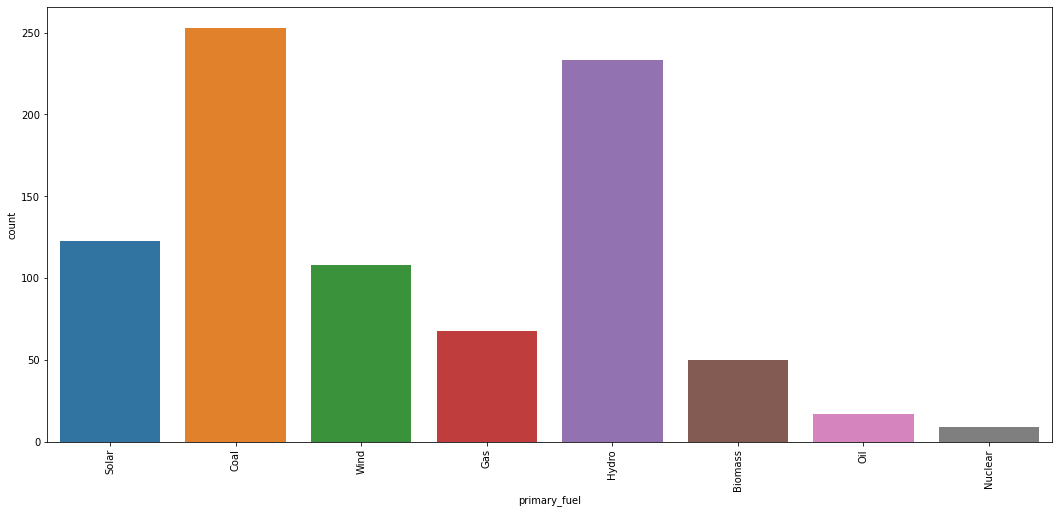

In [67]:
from matplotlib import pyplot as plt
plt.figure(figsize=(18,8))
ax = sns.countplot(x="primary_fuel",data=df_1_nominal)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
print(df_1_nominal["primary_fuel"].value_counts())

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

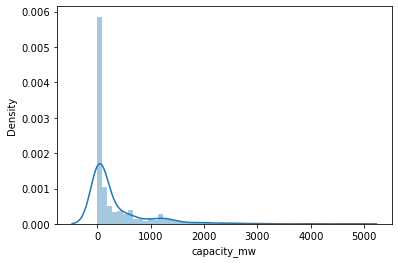

In [68]:
#Checking the distribution of float and int type columns
sns.distplot(df_1_nominal['capacity_mw'],kde =True)

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='latitude', ylabel='Density'>

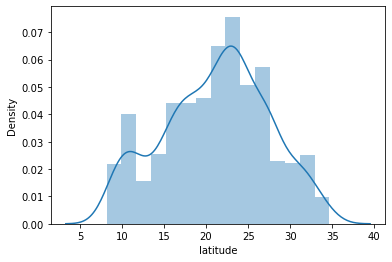

In [69]:
sns.distplot(df_1_nominal['latitude'],kde =True)

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='longitude', ylabel='Density'>

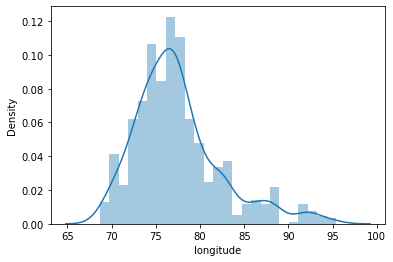

In [70]:
sns.distplot(df_1_nominal['longitude'],kde =True)

In [71]:
#Since we have data of rest of columns as object we will use encoding techniques to convert it into numeric data
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
for i in df_1_nominal.columns:
    if df_1_nominal[i].dtypes == "object":
        df_1_nominal[i] = enc.fit_transform(df_1_nominal[i].values.reshape(-1,1))
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [72]:
df_1_nominal.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
geolocation_source     0
plant_name(country)    0
dtype: int64

In [80]:
#Removing nan columns
import math
df_1_nominal.replace(math.nan,0, inplace=False)


In [98]:
df_1_nominal.describe

<bound method NDFrame.describe of      capacity_mw  latitude  longitude  primary_fuel  geolocation_source  \
0            2.5   28.1839    73.2407           6.0                 1.0   
1           98.0   24.7663    74.6090           1.0                 2.0   
2           39.2   21.9038    69.3732           7.0                 2.0   
3          135.0   23.8712    91.3602           2.0                 2.0   
4         1800.0   21.9603    82.4091           1.0                 2.0   
..           ...       ...        ...           ...                 ...   
902       1600.0   16.2949    77.3568           1.0                 2.0   
903          3.0   12.8932    78.1654           6.0                 0.0   
904         25.5   15.2758    75.5811           7.0                 2.0   
905         80.0   24.3500    73.7477           1.0                 2.0   
906         16.5    9.9344    77.4768           7.0                 2.0   

     plant_name(country)  
0                    0.0  
1          

<AxesSubplot:>

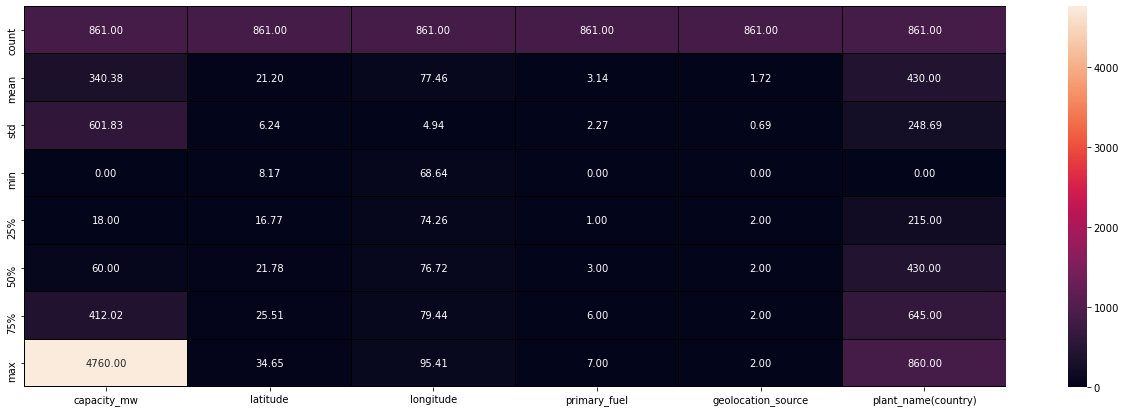

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize =(22,7))
sns.heatmap(df_1_nominal.describe(),annot =True,linewidths = 0.1, linecolor ="black", fmt = "0.2f")

In [83]:
#Checking coorelation of all columns with the target column
df_1_nominal.corr()['capacity_mw'].sort_values()

primary_fuel          -0.378447
latitude               0.051309
plant_name(country)    0.069753
longitude              0.197129
geolocation_source     0.216595
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

<AxesSubplot:>

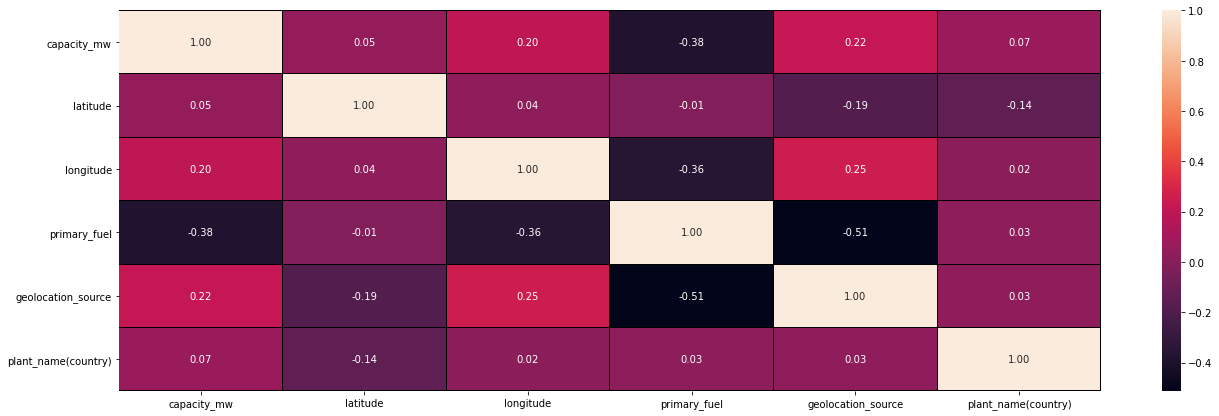

In [84]:
#drawing correlation heatmap
plt.figure(figsize =(22,7))
sns.heatmap(df_1_nominal.corr(),annot =True,linewidths = 0.1, linecolor ="black", fmt = "0.2f")

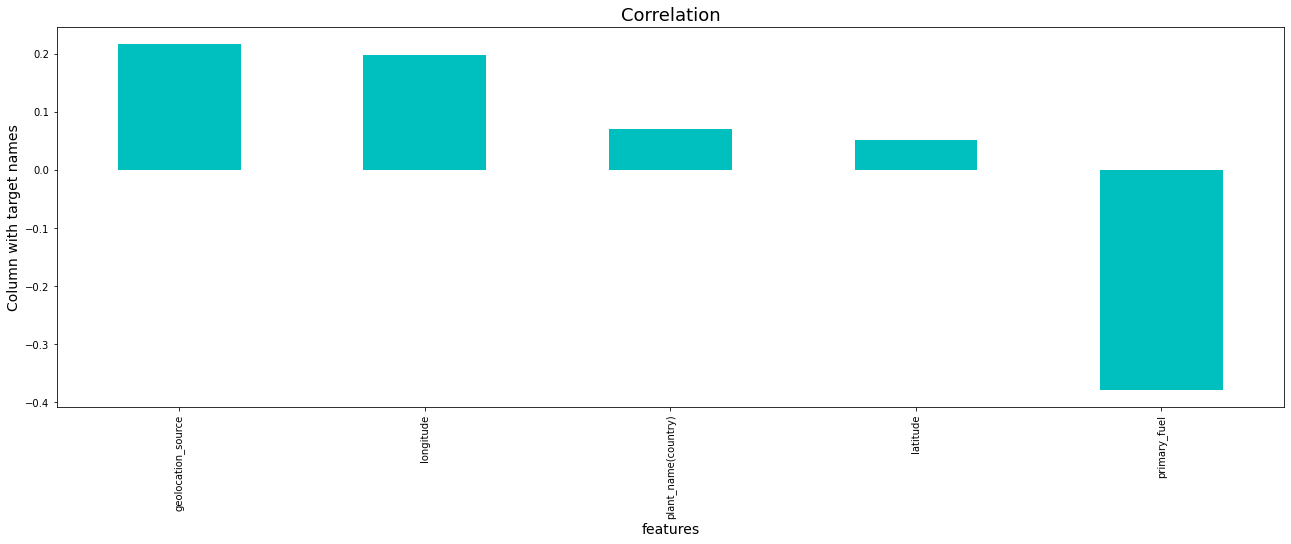

In [85]:
#Checking the correlation (+ve and -ve) with the target column in bar graph
plt.figure(figsize =(22,7))
df_1_nominal.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind= 'bar',color = "c")
plt.xlabel("features", fontsize = 14)
plt.ylabel("Column with target names", fontsize = 14)
plt.title("Correlation", fontsize =18)
plt.show()

In [86]:
#Checking skewness
df_1_nominal.skew()

capacity_mw            3.037191
latitude              -0.145866
longitude              1.112646
primary_fuel           0.507576
geolocation_source    -2.072165
plant_name(country)    0.000000
dtype: float64

capacity_mw               AxesSubplot(0.125,0.657941;0.227941x0.222059)
latitude               AxesSubplot(0.398529,0.657941;0.227941x0.222059)
longitude              AxesSubplot(0.672059,0.657941;0.227941x0.222059)
primary_fuel              AxesSubplot(0.125,0.391471;0.227941x0.222059)
geolocation_source     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
plant_name(country)    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

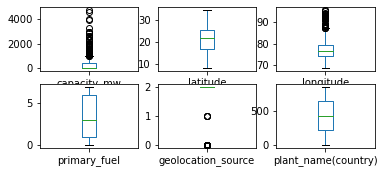

In [89]:
df_1_nominal.plot(kind='box',subplots =True,layout=(3,3))

In [91]:
from scipy.stats import zscore
#print(no.where(z>=3))
import numpy as np
z= np.abs(zscore(df_1_nominal))
np.where(z>3)

(array([ 14, 137, 141, 172, 176, 234, 297, 312, 319, 326, 346, 349, 350,
        361, 401, 410, 459, 469, 470, 494, 549, 610, 620, 628, 664, 692,
        730, 743, 745, 765, 775, 836]),
 array([0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2,
        0, 0, 0, 0, 0, 0, 0, 0, 2, 0]))

In [92]:
df_1_nominal.shape

(861, 6)

In [95]:
df_new = df_1_nominal[(z<3).all(axis=1)]


# Pridicting capacity_mw

In [101]:
#Seperating input and output as features and target
x = df_new.drop("capacity_mw",axis =1)
x = x.drop("plant_name(country)",axis =1)
y = df_new["capacity_mw"]

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
X_train = X_train.astype(int)
X_test = X_test.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor

In [117]:
# Logistic Classifier

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


7.03

In [119]:
# KNeighbors
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

56.84

In [120]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

24.14

In [131]:
# Random Forest

random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

72.46

In [126]:
# Support Vector Machines

svr = SVR()
svr.fit(X_train, y_train)
Y_pred = svr.predict(X_test)
acc_svr = round(svc.score(X_train, y_train) * 100, 2)
acc_svr

-26.11

In [128]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

56.22

In [132]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [acc_svr, acc_knn, acc_log,acc_random_forest, acc_gaussian,acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,72.46
1,KNN,56.84
5,Decision Tree,56.22
4,Naive Bayes,24.14
2,Logistic Regression,7.03
0,Support Vector Machines,-26.11


In [133]:
#Saving the optimum score model
import pickle
file_name = "churn.pkl"
pickle.dump(random_forest,open(file_name,"wb"))

# Pridicting Primary_fuel

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [144]:
#Seperating input and output as features and target
x = df_new.drop("primary_fuel",axis =1)
x = x.drop("plant_name(country)",axis =1)
y = df_new["primary_fuel"]

In [145]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [146]:
# Logistic Classifier

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


44.68

In [147]:
# KNeighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

72.79

In [148]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

58.74

In [149]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [150]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

In [151]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

37.84

In [152]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,acc_random_forest, acc_gaussian,acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
5,Decision Tree,100.00
1,KNN,72.79
4,Naive Bayes,58.74
2,Logistic Regression,44.68
0,Support Vector Machines,37.84


In [153]:
#Saving the optimum score model
import pickle
file_name = "churn.pkl"
pickle.dump(random_forest,open(file_name,"wb"))